## 常见激活函数 Activation Function

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

最后修订: 2020-01-29

---

### 1. 激活函数概览
---

所谓激活函数（Activation Function），就是在人工神经网络的神经元上运行的函数，负责将神经元的输入映射到输出端。


#### 1.1 什么是激活函数

激活函数（Activation functions）对于人工神经网络模型去学习、理解非常复杂和非线性的函数来说具有十分重要的作用。它们将非线性特性引入到我们的网络中。如图1，在神经元中，输入的 inputs 通过加权，求和后，还被作用了一个函数，这个函数就是激活函数。引入激活函数是为了增加神经网络模型的非线性。没有激活函数的每层都相当于矩阵相乘。就算你叠加了若干层之后，无非还是个矩阵相乘罢了。

![Image](https://gss2.bdstatic.com/-fo3dSag_xI4khGkpoWK1HF6hhy/baike/c0%3Dbaike80%2C5%2C5%2C80%2C26/sign=27a32abe59fbb2fb202650402e234bc1/8cb1cb1349540923a319419d9e58d109b2de49e4.jpg)

#### 1.2 为什么要用激活函数

如果不用激活函数，每一层输出都是上层输入的线性函数，无论神经网络有多少层，输出都是输入的线性组合，这种情况就是最原始的感知机（Perceptron）。

如果使用的话，激活函数给神经元引入了非线性因素，使得神经网络可以任意逼近任何非线性函数，这样神经网络就可以应用到众多的非线性模型中。

### 2. 常见的激活函数

---

#### 2.1 Sigmoid

**Sigmoid**函数是最基础也是曾经被应用最多的激活函数，它被广泛应用到BP神经网络，最初的ANN和MLP中。直到今天，在诸如`循环神经网络RNN`, `概率模型`, `自编码器AutoEncode`中仍然被广泛使用。根据它的形状，我们有时候也称它为***S***形函数。下面给出Sigmoid函数的`数学表达`和`Python Code`.

$$f(x) = \frac{1}{1+e^{-x}}$$

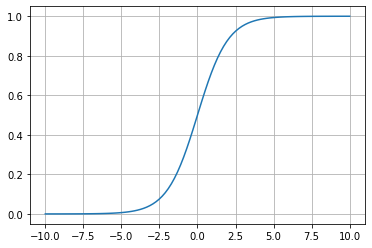

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    y=1.0/(1.0+np.exp(-x))
    return y

x=np.linspace(start=-10,stop=10,num=100)
y=sigmoid(x)

plt.plot(x,y)
plt.grid(True)
plt.show()

#### 2.2 tanh

$$f(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$$

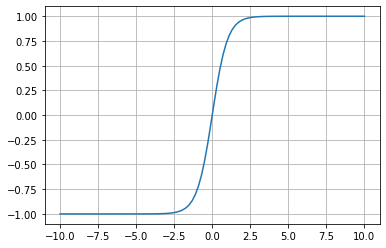

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    y=(1.0-np.exp(-2*x))/(1.0+np.exp(-2*x))
    return y


x=np.linspace(start=-10,stop=10,num=100)
y=tanh(x)

plt.plot(x,y)
plt.grid(True)
plt.show()

#### 2.3 ReLU

修正线性单元(Rectified Linear Unit, ReLU)起源于神经科学的研究, 2001年，Dayan、Abott从生物学角度模拟出了脑神经元接受信号更精确的激活模型. 但是，它被广泛应用应该追溯到2013年的Alexnet:《ImageNet Classification with Deep Convolutional Neural Networks》. 该论文由Alex Krizhevsky和Geoffrey Hinton撰写，它们所提出的AlexNet获得了当年ImageNet竞赛的冠军，并且以较大优势领先第二名，并称为了今天著名的卷积神经网络（CNN）和深度学习（DeepLearning）的标杆之作。

> 所以，希望所有同学都要认真阅读这篇论文，同时将其实现出来（这也是《深度学习：Deep Learning》课程必修工作）。

<font color='red'>ReLU是目前使用最广的激活函数，也是目前深度学习、卷积神经网络的事实标准激活函数，需要每个同学都认真掌握。</font>

**ReLU的数学表达式（简单之美）：**

$$f(x) = max(0, x)$$

或

$$ f(x) = 
\begin{cases}
x & x \geq 0 \\
0 & x < 0 \\
\end{cases}
$$

**ReLU的有效性体现在两个方面：**
- 克服梯度消失的问题
- 加快训练速度

这两个方面是相辅相成的，因为克服了梯度消失问题，所以训练才会快。关于ReLU有一段精彩的话，引用如下：

> 几十年的机器学习发展中，我们形成了这样一个概念：非线性激活函数要比线性激活函数更加先进。

> 尤其是在布满Sigmoid函数的BP神经网络，布满径向基函数的SVM神经网络中，往往有这样的幻觉，非线性函数对非线性网络贡献巨大。

> 该幻觉在SVM中更加严重。核函数的形式并非完全是SVM能够处理非线性数据的主力功臣（支持向量充当着隐层角色）。

> 那么在深度网络中，对非线性的依赖程度就可以缩一缩。在深度神经网络中，稀疏特征并不需要网络具有很强的处理线性不可分机制。

> 综合以上两点，在深度学习模型中，使用简单、速度快的线性激活函数可能更为合适。




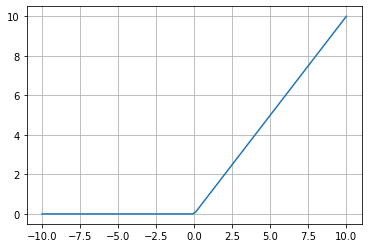

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    y=x.copy()
    y[y<0]=0
    return y

x=np.linspace(start=-10,stop=10,num=100)
y=relu(x)
# print(y)
plt.plot(x,y)
plt.grid(True)
plt.show()

#### 2.4 LReLU, PReLU, RReLU

这三个激活函数都是对ReLU激活函数的改进，大体上可以统一为以下公示：

$$ f(y_i) = 
\begin{cases}
y & x \geq 0 \\
a_i y_i & x < 0 \\
\end{cases}
$$

其中 $a$ 可以看作是斜率，也就是说，改进版的ReLU多引入了一个参数。
- LReLU(Leaky ReLU), $a$ 是固定的, 需要通过各种验证方式选出一个合适的a值
- PReLU(Parametric ReLU), 对LReLU的改进, 可以自适应的学习参数而不是固定的, 原论文中建议初始化为0.25
- RReLU(Randomized Leaky ReLU), $a$ 是一个给定范围内的随机变量, 随机选择的, 在一定程度上可以起到正则化的作用

![ReLU](https://raw.githubusercontent.com/stdcoutzyx/Blogs/master/blogs2016/imgs_relu/1.png)

下面给出LReLU的Python代码

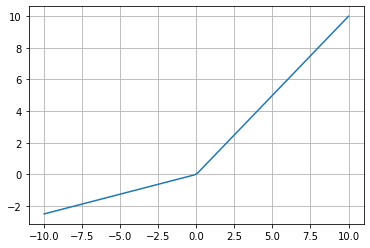

In [4]:
# ReLU
import numpy as np
import matplotlib.pyplot as plt

def lrelu(x,a):
    y=x.copy()
    for i in range(y.shape[0]):
        if y[i]<0:
            y[i]=a*y[i]
    return y

x=np.linspace(start=-10,stop=10,num=100)
y=lrelu(x,0.25)
# print(x)
# print(y)
plt.plot(x,y)
plt.grid(True)
plt.show()

#### 2.5 ELU

Exponential Linear Units的缩写,函数形式为

$$ f(x) = 
\begin{cases}
x & x \geq 0 \\
a(a^x - 1) & x < 0 \\
\end{cases}
$$

其中, $a > 0$.

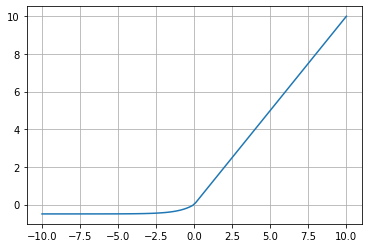

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def elu(x,a):
    y=x.copy()
    for i in range(y.shape[0]):
        if y[i]<0:
            y[i]=a*(np.exp(y[i])-1)
    return y

x=np.linspace(start=-10,stop=10,num=100)
y=elu(x,0.5)
# print(x)
# print(y)
plt.plot(x,y)
plt.grid(True)
plt.show()

#### 2.6 Softplus

数学表达:

$$f(x) = log(e^x + 1)$$

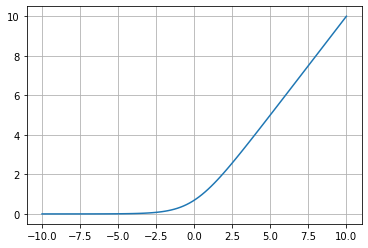

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def softplus(x):
    y=np.log(np.exp(x)+1)
    return y

x=np.linspace(start=-10,stop=10,num=100)
y=softplus(x)

plt.plot(x,y)
plt.grid(True)
plt.show()

#### 2.7 Softsign

数学表达：

$$f(x) = \frac{x}{|x| + 1}$$

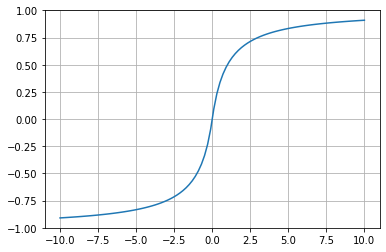

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def softsign(x):
    y=x/(np.abs(x)+1)
    return y

x=np.linspace(start=-10,stop=10,num=100)
y=softsign(x)

plt.plot(x,y)
plt.grid(True)
plt.show()